# Análise dos Dados

In [1]:
#@title Configurações iniciais
import pandas as pd
import numpy as np
from ipywidgets import interact

import seaborn as sns
import matplotlib.pyplot as plt

BASE_PATH = 'dados/'

In [2]:
df = pd.read_excel(BASE_PATH + 'bolsonaro-preproc1.xlsx')
df

,ID,DiaDaSemana,Duracao,Retórica Aristotélica,Dispositivo Retórico,Tipo de conteúdo,Abordagem,Tonalidade,Main character,Texto / Hashtag,Plays,Curtidas,Comentarios,Compart.
0,7114971700365691904,Friday,57.93,Pathos,Political Statement,Campaign Act,Acclamation,Neutral,Self alone,Hashtag,248400,24400,1083,1566
1,7115050482179050496,Friday,17.13,Logos,Fact/Statistic,Political-Purposeful,Acclamation,Positive,Self alone,Hashtag,82000,9163,480,1140
2,7115120078982631424,Friday,52.54,Ethos,Commitment,Political-Purposeful,Acclamation,Positive,Self + voters,Hashtag,42300,3485,198,355
3,7115161088219565056,Friday,34.48,Nenhum,Humor,Personal,Acclamation,Positive,Self alone,Hashtag,168500,22100,666,967
4,7115207919750253568,Friday,66.66,Logos,Fact/Statistic,Political-Purposeful,Attack,Negative,Self alone,Hashtag,1800000,115700,5390,53800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,7159766081593151488,Sunday,74.16,Ethos,Endorsement,Campaign Act,Acclamation,Positive,Nenhum,Hashtag,569300,95300,2649,9207
257,7159773640030997504,Sunday,5.32,Ethos,Humor,Nenhum,Attack,Neutral,Self + opponent,Texto + Hashtag,2000000,240900,3251,3294
258,7159891102143631360,Sunday,7.73,Nenhum,Humor,Nenhum,Attack,Neutral,Self + opponent,Hashtag,926400,109600,1157,381
259,7159943895445441536,Sunday,8.38,Ethos,Humor,Nenhum,Acclamation,Neutral,Self + opponent,Hashtag,365600,52100,1176,1172


## 1 - Análise dos Possíveis Atributos Alvos

### 1.1 - Correlações

Correlações entre as colunas de saída na escala **normal**:

In [3]:
df[['Plays', 'Curtidas', 'Comentarios', 'Compart.']].corr()

,Plays,Curtidas,Comentarios,Compart.
Plays,1.000000,0.967794,0.843459,0.832938
Curtidas,0.967794,1.000000,0.877877,0.795186
Comentarios,0.843459,0.877877,1.000000,0.775567
Compart.,0.832938,0.795186,0.775567,1.000000


Correlações na escala **logarítmica**:

In [4]:
np.log(df[['Plays', 'Curtidas', 'Comentarios', 'Compart.']]).corr()

c:\Users\pablo\.conda\envs\socialnet\lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


,Plays,Curtidas,Comentarios,Compart.
Plays,1.000000,0.982994,0.918476,0.838830
Curtidas,0.982994,1.000000,0.925436,0.849965
Comentarios,0.918476,0.925436,1.000000,0.861550
Compart.,0.838830,0.849965,0.861550,1.000000


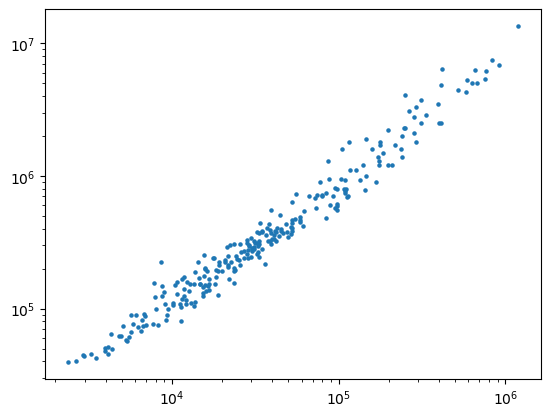

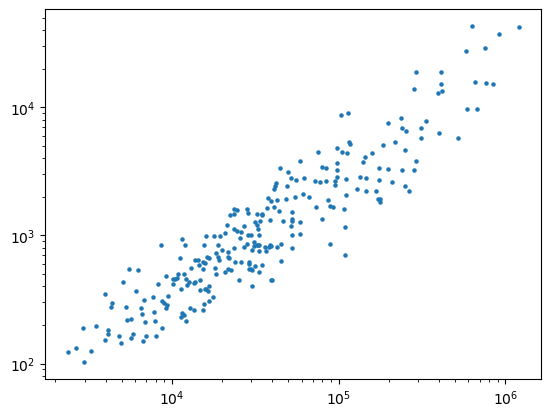

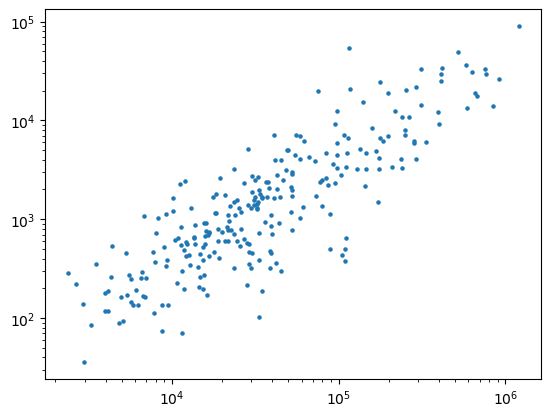

In [5]:
# scatter plots de Curtidas x cada uma das demais colunas
# na escala logarítmica
for col in ['Plays', 'Comentarios', 'Compart.']:
    #sns.scatterplot(data=df, x='Curtidas', y=col)
    plt.scatter(df['Curtidas'], df[col], s=5)
    plt.xscale('log')
    plt.yscale('log')
    plt.show()

**Decisão**: Usar *curtidas* como base para os atributos alvos. (Os demais são correlacionados às curtidas).

### 1.2 - Distribuição do Atributo Alvo

In [6]:
df['Curtidas-Log'] = np.log(df['Curtidas'])
df[['Curtidas','Curtidas-Log']].describe()

,Curtidas,Curtidas-Log
count,2.610000e+02,261.000000
mean,9.253186e+04,10.497233
std,1.639625e+05,1.329058
min,2.368000e+03,7.769801
25%,1.430000e+04,9.568015
50%,3.150000e+04,10.357743
75%,9.260000e+04,11.436044
max,1.200000e+06,13.997832


c:\Users\pablo\.conda\envs\socialnet\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


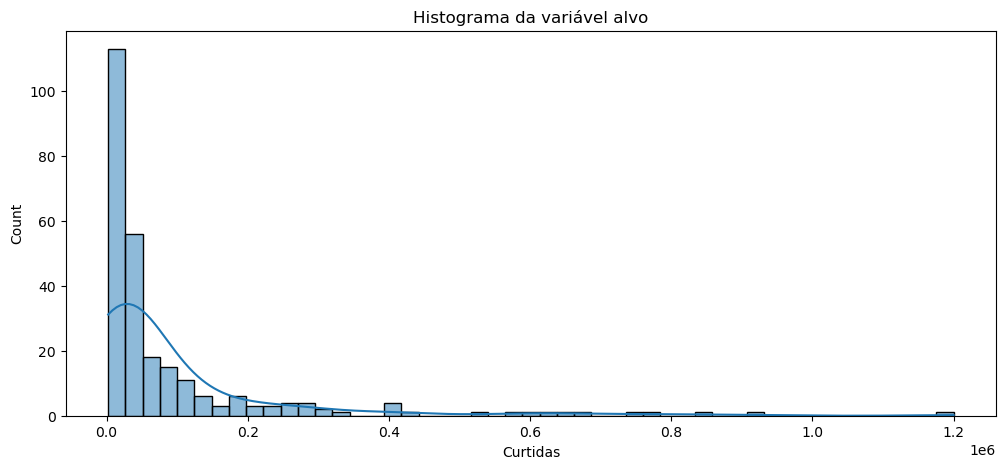

In [7]:
# histogram of the target variable
plt.figure(figsize=(12, 5))
sns.histplot(df['Curtidas'], kde=True, cumulative=False)
plt.title('Histograma da variável alvo')
plt.show()

c:\Users\pablo\.conda\envs\socialnet\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


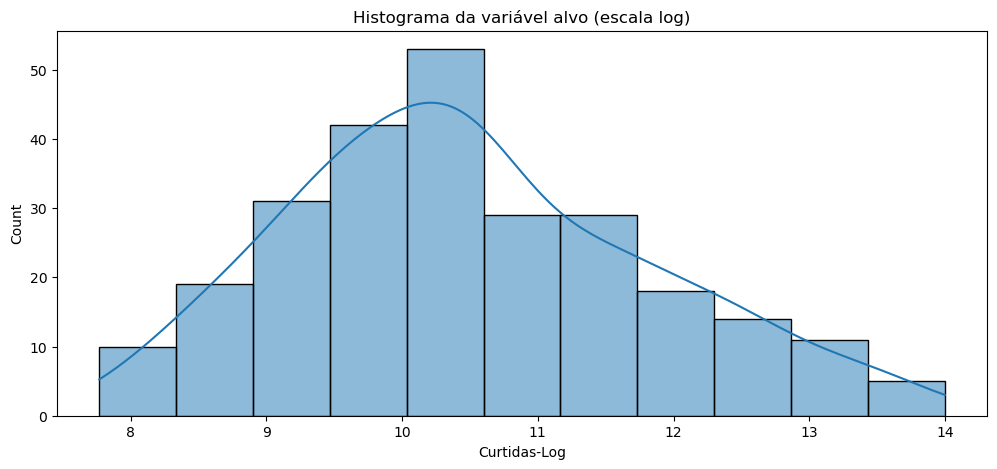

In [8]:
plt.figure(figsize=(12, 5))
sns.histplot(df['Curtidas-Log'], kde=True, cumulative=False)
plt.title('Histograma da variável alvo (escala log)')
plt.show()

### 1.3 - Criando Versões de Classificação

Vamos definir uma quantidade de "corte" de 100 mil curtidas, para dividir em duas classes.

In [9]:
df['Curtidas'].max()

1200000

In [10]:
# divide em 4 classes balanceadas
df['Curtidas-4Classes'] = pd.cut(df['Curtidas'], bins=[0, 14_000, 31_500, 92_000, 10_000_000], labels=['low', 'medium-low', 'medium-high', 'high'])

In [11]:
df['Curtidas-4Classes'].value_counts()

Curtidas-4Classes
medium-low     66
high           66
low            65
medium-high    64
Name: count, dtype: int64

In [12]:
df.groupby('Curtidas-4Classes')[['Curtidas', 'Curtidas-Log']].mean()

C:\Users\pablo\AppData\Local\Temp\ipykernel_15488\1177205202.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Curtidas-4Classes')[['Curtidas', 'Curtidas-Log']].mean()


,Curtidas,Curtidas-Log
Curtidas-4Classes,,
low,8157.153846,8.908831
medium-low,22177.272727,9.976098
medium-high,50131.250000,10.774163
high,287098.484848,12.314164


In [13]:
#df['Curtidas-2Classes'] = df['Curtidas'] > 92_000   # usando 75-percentil
df['Curtidas-2Classes'] = df['Curtidas'] > 100_000   # usando valor um pouco acima

In [14]:
df['Curtidas-2Classes'].value_counts()

Curtidas-2Classes
False    202
True      59
Name: count, dtype: int64

In [15]:
TARGET_COLUMNS = ['Curtidas', 'Curtidas-Log', 'Curtidas-4Classes', 'Curtidas-2Classes']

## 2 - Analisando Atributos de Entrada Categóricos

In [16]:
INPUT_CATEGORICAL_COLS = ['DiaDaSemana', 'Retórica Aristotélica', 'Dispositivo Retórico', 'Tipo de conteúdo', 
              'Abordagem', 'Tonalidade', 'Main character', 'Texto / Hashtag']

### 2.1 - Visualização dos dados

In [17]:
# usar piwidget para selecionar a coluna
# e, depois, mostrar um histograma dos valores da coluna
# mostrar os labels dos valores inclinados de 90 graus
def show_values_histogram(column):
    plt.title("Distribuição entre as valores (classes) da variável")
    #sns.histplot(df[column], bins=20)
    plt.hist(df[column], bins=20)
    plt.xticks(rotation=90)
    plt.show()

interact(show_values_histogram, column=df.columns[1:])

interactive(children=(Dropdown(description='column', options=('DiaDaSemana', 'Duracao', 'Retórica Aristotélica…

<function __main__.show_values_histogram(column)>

In [18]:
import scipy.stats as stats

from IPython.display import display, Markdown

In [19]:
# usar piwidget para selecionar a coluna
# e, depois, mostrar um histograma das distribuições dos likes
# para cada valor distinto da coluna
def show_likes_distribution_per_value(column, log_scale):
    display(Markdown(f'## Distribuição dos likes para o atributo "{column}"'))
    curtidas_log = np.log(df['Curtidas'])
    if log_scale:
        min_likes, max_likes = curtidas_log.min(), curtidas_log.max()
    else:
        min_likes, max_likes = df['Curtidas'].min(), df['Curtidas'].max()
    for value in df[column].unique():
        if log_scale:
            likes_in_group = curtidas_log[df[column] == value]
        else:
            likes_in_group = df[df[column] == value]['Curtidas']
        sns.histplot(likes_in_group, bins=20, stat='probability', kde=True)
        plt.title(f"Distribuição dos likes para {column}={value}")
        if log_scale:
            plt.xlabel('log(Likes)')
        else:
            plt.xlabel("Likes")
        plt.ylabel("Probabilidade")
        plt.xlim(min_likes, max_likes)
        plt.ylim(0.0, 1.0)
        plt.show()
        if len(likes_in_group) < 3:
            display(Markdown(
                f"**Atenção**: não é possível fazer o teste de Shapiro, por ter poucos exemplos ({len(likes_in_group)}) para {column}={value}"
            ))
        else:
            _, p_value = stats.shapiro(likes_in_group)
            normality_str = "normal" if p_value > 0.05 else "não normal"
            display(Markdown(
                f"**Teste de normalidade de Shapiro** para {column}={value}: p-value={p_value:.4f} ({normality_str})"
            ))

interact(show_likes_distribution_per_value, column=INPUT_CATEGORICAL_COLS, log_scale=False)

interactive(children=(Dropdown(description='column', options=('DiaDaSemana', 'Retórica Aristotélica', 'Disposi…

<function __main__.show_likes_distribution_per_value(column, log_scale)>

### 2.2 - Relevância das variáveis categóricas

Aqui, fazemos testes para estimar a relevâncias das variáveis de entrada categóricas na previsão da variável alvo.

In [20]:
def tests_per_categories(df, input_col, target_col, use_log_of_target=[False,False]):
    '''
    Função que retorna alguns resultados para estimar se a variável categórica é relevante para prever a variável alvo numérica. 
    Em todos os casos, a estimativa é baseada nos valores de `target_col` quando os dados são filtrados para cada valor de `input_col`. 
    Por enquanto, retorna tupla com dois valores:
    - 0: p-value do teste ANOVA, que indica a probabilidade de ser verdade a hipótese nula de que as médias das amostras (agrupadas para
    cada valor de `input_col`são iguais). Se for significativamente baixo (<=0.05, por exemplo), a hipótese nula pode ser rejeitada.
    - 1: p-value do teste de Kruskal-Wallis, que é uma versão não-paramétrica do teste ANOVA. É mais robusto que o ANOVA quando
    as premissas do ANOVA não são satisfeitas.
    - 2: desvio padrão entre as médias dos valores das amostras para cada valor de `input_col`.
    '''
    groups = df.groupby(input_col)[target_col]
    groups = [group for (name, group) in groups]
    log_groups = None
    if use_log_of_target[0] or use_log_of_target[1]:
        log_groups = [np.log(group) for group in groups]

    # Calculate ANOVA
    if use_log_of_target[0]:
        anova_p_val = stats.f_oneway(*log_groups).pvalue
    else:
        anova_p_val = stats.f_oneway(*groups).pvalue

    # Calculate Kruskal-Wallis
    if use_log_of_target[1]:
        kruskalwallis_p_val = stats.kruskal(*log_groups).pvalue
    else:
        kruskalwallis_p_val = stats.kruskal(*groups).pvalue

    # Calculate standard deviation of means
    std_dev = np.std([group.mean() for group in groups])

    return anova_p_val, kruskalwallis_p_val, std_dev

In [21]:
# creates a dataframe with a colum for the column names and another ones for the values returnde by the tests_per_categories
# calculated with tests_per_categories
def calculate_tests(df, input_cols, target_col, target_log=[False,False]):
    results = []
    for col in input_cols:
        an_p_val, kw_p_val, std_dev = tests_per_categories(df, col, target_col, use_log_of_target=target_log)
        an_p_val = round(an_p_val, 5)
        kw_p_val = round(kw_p_val, 5)
        std_dev = round(std_dev, 5)
        results.append((col, an_p_val, kw_p_val, std_dev))
    return pd.DataFrame(results, columns=['Column Label', 'ANOVA P-value', 'K.W. P-value', 'Std Dev'])

In [22]:
# the ANOVA is calculated with log of the target variable, while the Kruskal-Wallis is calculated without log
df_col_tests = calculate_tests(df, INPUT_CATEGORICAL_COLS, 'Curtidas', target_log=[True,False])
#df_col_tests

In [23]:
# selecionei os quatro melhores deste ranking
# requer distr. normal e com mesma variância, MAS é robusto a desvios (https://en.wikipedia.org/wiki/One-way_analysis_of_variance)
df_col_tests.sort_values('ANOVA P-value')

,Column Label,ANOVA P-value,K.W. P-value,Std Dev
2,Dispositivo Retórico,0.00000,0.00000,121399.34275
6,Main character,0.00075,0.00051,51992.14233
1,Retórica Aristotélica,0.00107,0.00041,28001.82045
3,Tipo de conteúdo,0.00516,0.00740,31442.26320
7,Texto / Hashtag,0.00572,0.00693,61546.37138
5,Tonalidade,0.08970,0.13394,62071.06586
4,Abordagem,0.29451,0.31017,9444.95971
0,DiaDaSemana,0.93668,0.90990,14626.95409


In [24]:
df_col_tests.sort_values('K.W. P-value')

,Column Label,ANOVA P-value,K.W. P-value,Std Dev
2,Dispositivo Retórico,0.00000,0.00000,121399.34275
1,Retórica Aristotélica,0.00107,0.00041,28001.82045
6,Main character,0.00075,0.00051,51992.14233
7,Texto / Hashtag,0.00572,0.00693,61546.37138
3,Tipo de conteúdo,0.00516,0.00740,31442.26320
5,Tonalidade,0.08970,0.13394,62071.06586
4,Abordagem,0.29451,0.31017,9444.95971
0,DiaDaSemana,0.93668,0.90990,14626.95409


In [25]:
# e os quatro melhores deste ranking
df_col_tests.sort_values('Std Dev', ascending=False)

,Column Label,ANOVA P-value,K.W. P-value,Std Dev
2,Dispositivo Retórico,0.00000,0.00000,121399.34275
5,Tonalidade,0.08970,0.13394,62071.06586
7,Texto / Hashtag,0.00572,0.00693,61546.37138
6,Main character,0.00075,0.00051,51992.14233
3,Tipo de conteúdo,0.00516,0.00740,31442.26320
1,Retórica Aristotélica,0.00107,0.00041,28001.82045
0,DiaDaSemana,0.93668,0.90990,14626.95409
4,Abordagem,0.29451,0.31017,9444.95971


#### Post-hoc Analysis

In [26]:
# instalar com: pip install scikit-posthocs
import scikit_posthocs as sp

ModuleNotFoundError: No module named 'scikit_posthocs'

In [ ]:
def kruskal_wallis_posthoc(df, input_col, target_col, alpha=0.05):
    # Perform Kruskal-Wallis test
    groups = [group for name, group in df.groupby(input_col)[target_col]]
    kruskal_stat, p_value = stats.kruskal(*groups)
    
    if p_value < alpha:
        # Conduct pairwise comparisons using Dunn's test
        dunn_results = sp.posthoc_dunn(groups, p_adjust='bonferroni')
        
        # Extract significant comparisons
        significant_comparisons = [(group1, group2) for group1, group2 in zip(*np.where(dunn_results < alpha))]
        
        return kruskal_stat, p_value, significant_comparisons
    else:
        return kruskal_stat, p_value, None

In [ ]:
# Example usage:
#kruskal_stat, p_value, significant_comparisons = kruskal_wallis_posthoc(df, 'DiaDaSemana', 'Curtidas')
kruskal_stat, p_value, significant_comparisons = kruskal_wallis_posthoc(df, 'Dispositivo Retórico', 'Curtidas')

print("Kruskal-Wallis Statistic:", kruskal_stat)
print("P-value:", p_value)

if significant_comparisons:
    print("Significant Comparisons:")
    for group1, group2 in significant_comparisons:
        print(f"{group1} vs {group2}")
else:
    print("No significant differences between groups.")

Kruskal-Wallis Statistic: 55.274782683350274
P-value: 1.6157641418217824e-07
Significant Comparisons:
3 vs 4
3 vs 6
4 vs 3
5 vs 6
6 vs 3
6 vs 5
6 vs 10
10 vs 6


Ideia:
- processar cada variável categórica e unificar as classes sem diferenças?

### 2.3 - Escolha dos Atributos ???

Analisando dois atributos que foram mal em cada um dos testes (e apenas em um deles).

In [ ]:
def summarize_likes_grouped_by(column):
    df_aux1 = df.groupby(column)['Curtidas'].agg(['count', 'mean', 'std'])
    df_aux1['coef.var.'] = df_aux1['std'] / df_aux1['mean']
    return df_aux1.sort_values('mean', ascending=False)

In [ ]:
summarize_likes_grouped_by("Tonalidade")

,count,mean,std,coef.var.
Tonalidade,,,,
Negative,6,220916.666667,237647.532423,1.075734
Positive,112,103493.089286,190445.597053,1.840177
Neutral,143,78560.062937,133774.942476,1.702836


In [ ]:
summarize_likes_grouped_by("Abordagem")

,count,mean,std,coef.var.
Abordagem,,,,
Attack,41,109889.414634,165394.660999,1.505101
Defense,19,104879.473684,155026.638339,1.478141
Acclamation,201,87824.074627,164973.369829,1.878453


In [ ]:
summarize_likes_grouped_by("DiaDaSemana")

,count,mean,std,coef.var.
DiaDaSemana,,,,
Monday,32,115668.250000,230041.368669,1.988803
Wednesday,30,105876.600000,151440.539220,1.430349
Tuesday,31,100023.903226,163334.010895,1.632950
Saturday,39,90747.717949,198304.147250,2.185225
Friday,44,89036.636364,146318.354138,1.643350
Sunday,50,88080.260000,130969.925522,1.486938
Thursday,35,66045.885714,130383.645380,1.974137


*Sugestão*: Remover apenas `DiaDaSemana`.

In [30]:
SELECTED_CATEGORICAL_COLS = ['Dispositivo Retórico', 'Main character', 'Retórica Aristotélica', 'Tipo de conteúdo',
                             'Texto / Hashtag', 'Tonalidade', 'Abordagem']

### 2.4 - Relevância da variável numérica

In [ ]:
df[['Duracao', 'Curtidas']].corr()

,Duracao,Curtidas
Duracao,1.000000,-0.171347
Curtidas,-0.171347,1.000000


**Decisão**: Ela está levemente negativamente correlacionada. Pode ser (levemente) útil.

## 3. Target Encoding + PCA

In [31]:
from sklearn.preprocessing import TargetEncoder
from sklearn.model_selection import train_test_split

In [32]:
df.set_index('ID', inplace=True)

KeyError: "None of ['ID'] are in the columns"

In [33]:
X_train, X_test, y_train, y_test = train_test_split(df[SELECTED_CATEGORICAL_COLS + ['Duracao']], df[TARGET_COLUMNS], 
                                                    stratify=df['Curtidas-4Classes'],
                                                    test_size=0.2, 
                                                    shuffle=True,
                                                    random_state=42)

In [34]:
df['Duracao']

ID
7114971700365691904    57.93
7115050482179050496    17.13
7115120078982631424    52.54
7115161088219565056    34.48
7115207919750253568    66.66
                       ...  
7159766081593151488    74.16
7159773640030997504     5.32
7159891102143631360     7.73
7159943895445441536     8.38
7160017587160484864    51.34
Name: Duracao, Length: 261, dtype: float64

CORREÇÃO A FAZER:
- setar as 2 classes pelo 75-percentil exato, para ser coerente com a divisão dos dados estratificada

FAZR: 
- tentar fazer ele ignorar a duração 
- ou tentar obter os IDs das entrada e fazer o merge desta coluna de volta...

In [43]:
targetenc = TargetEncoder(shuffle=False, target_type='continuous')

X_train_encoded = targetenc.fit_transform(X_train[SELECTED_CATEGORICAL_COLS], y_train['Curtidas'])

In [ ]:
targetenc.categories_

In [44]:
X_train_encoded.shape, X_train.shape

((208, 7), (208, 8))

In [45]:
# convert X_train_encoded into a DataFrame
X_train_encoded = pd.DataFrame(X_train_encoded, columns=SELECTED_CATEGORICAL_COLS, index=X_train.index)
X_train_encoded['Duracao'] = X_train['Duracao']
X_train_encoded

,Dispositivo Retórico,Main character,Retórica Aristotélica,Tipo de conteúdo,Texto / Hashtag,Tonalidade,Abordagem,Duracao
ID,,,,,,,,
7157697379070675968,159852.897281,86724.225373,140277.245299,130657.101475,92034.360619,118732.328155,95233.310654,17.00
7145403203637529600,124249.338976,113146.086283,77416.466701,101967.321247,92034.360619,118732.328155,95233.310654,59.60
7159536039252577280,77652.414984,32738.749830,77416.466701,101967.321247,92034.360619,118732.328155,95233.310654,63.41
7115207919750253568,62197.930815,86724.225373,51151.303391,48663.839586,92034.360619,159578.973268,94832.400551,66.66
7119045148578777088,124249.338976,134700.591318,93469.795551,48663.839586,92034.360619,72072.701335,94832.400551,43.81
...,...,...,...,...,...,...,...,...
7148384658416307200,99376.407186,190597.218744,89717.843194,106232.634111,96219.348823,129382.678295,102515.909566,23.61
7157773223302679552,102479.998366,209156.480451,89717.843194,106232.634111,96219.348823,129382.678295,102515.909566,40.52
7121355653561502720,171798.755502,60638.421794,89717.843194,106232.634111,96219.348823,129382.678295,102515.909566,11.65


In [50]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [52]:
# Normaliza os dados usando o StandardScaler do scikit-learn
#scaler = StandardScaler()
scaler = MinMaxScaler()

dfx_pca = scaler.fit_transform(X_train_encoded)

# Cria uma instância do PCA e aplica aos dados normalizados
pca = PCA()
dfx_pca = pca.fit_transform(dfx_pca)

# Determina quantos componentes principais devem ser mantidos
# É a quantidade suficiente para explicar 90% da variação dos dados
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
#num_componentes = np.argmax(cum_var_exp >= 0.8) + 1
num_componentes = np.argmax(cum_var_exp >= 0.9) + 1  # desempenho menor

# Seleciona os componentes principais e transforma os dados originais
dfx_pca_r = dfx_pca[:, 0:num_componentes]

# Os dados normalizados e com componentes principais são selecionados
dfx_model = pd.DataFrame(data=dfx_pca_r, columns=[f'PCA_attr_{i+1}' for i in range(dfx_pca_r.shape[1])])



C:\Users\pablo\AppData\Local\Temp\ipykernel_15488\2923555485.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(SELECTED_CATEGORICAL_COLS + ['Duracao'], rotation=45)
C:\Users\pablo\AppData\Local\Temp\ipykernel_15488\2923555485.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(SELECTED_CATEGORICAL_COLS + ['Duracao'], rotation=45)


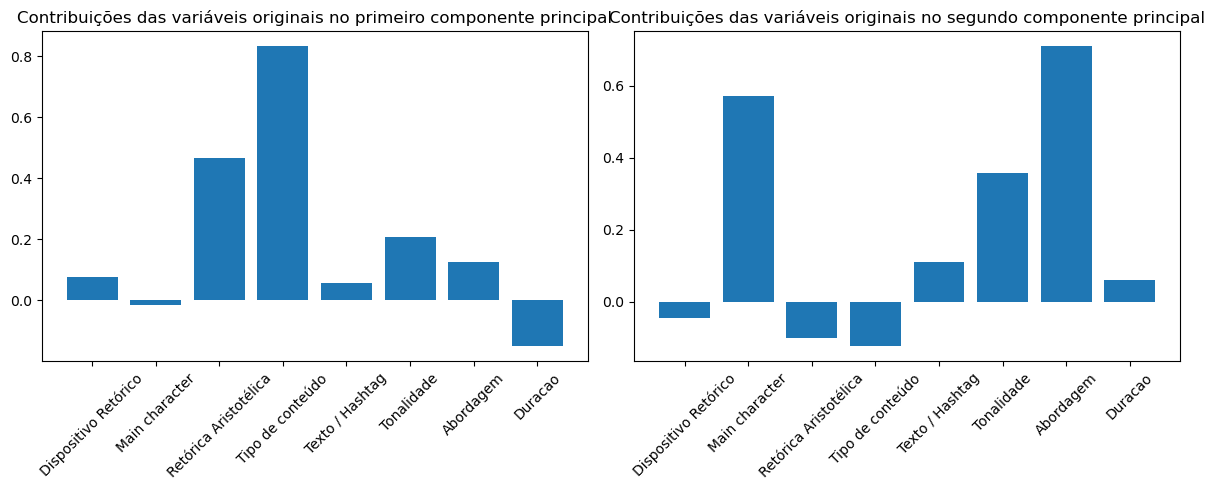

In [61]:
# contributions of the original variables in the first and second components
contributions1 = pca.components_[0]
contributions2 = pca.components_[1]

# create a single figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# plot the contributions as a bar plot in the first subplot
axs[0].bar(x=SELECTED_CATEGORICAL_COLS + ['Duracao'], height=contributions1)
axs[0].set_xticklabels(SELECTED_CATEGORICAL_COLS + ['Duracao'], rotation=45)
axs[0].set_title('Contribuições das variáveis originais no primeiro componente principal')

# plot the contributions as a bar plot in the second subplot
axs[1].bar(x=SELECTED_CATEGORICAL_COLS + ['Duracao'], height=contributions2)
axs[1].set_xticklabels(SELECTED_CATEGORICAL_COLS + ['Duracao'], rotation=45)
axs[1].set_title('Contribuições das variáveis originais no segundo componente principal')

# display the figure with subplots
plt.tight_layout()
plt.show()

In [53]:
dfx_model

,PCA_attr_1,PCA_attr_2,PCA_attr_3,PCA_attr_4,PCA_attr_5,PCA_attr_6
0,0.625036,0.028271,0.096427,-0.201530,-0.142917,0.087201
1,0.075125,0.227240,-0.074260,0.174280,0.091327,0.093745
2,0.071901,-0.023329,-0.418079,0.016670,0.087146,0.092878
3,-0.397413,0.319207,-0.339768,0.152051,-0.081254,0.322954
4,-0.292486,0.219018,0.254353,-0.149085,0.009888,-0.006387
...,...,...,...,...,...,...
203,0.234405,0.598238,0.240307,0.187847,-0.117344,-0.014273
204,0.212482,0.665383,0.293300,0.229207,0.010952,0.045240
205,0.269184,0.173957,-0.256350,-0.070234,-0.276146,-0.068494
206,0.220283,0.485642,0.057612,0.112409,0.108224,0.107871


In [ ]:
#dfx_test = pca.transform( scaler.transform(dfx_test) )[:, 0:num_componentes]
#dfx_test = pd.DataFrame(data=dfx_test, columns=dfx_model.columns)

In [64]:
print("Explicação da variância por cada componente PCA:", *[f'{(100*n):.1f}%' for n in  pca.explained_variance_ratio_])
print("Acumulados:", cum_var_exp)
#print("-")
#print("Composição dos componentes em relação aos atributos originais:")
#pd.DataFrame(index=[f'PCA_attr_{i+1}' for i in range(len(pca.components_))], columns=X_train_encoded.columns, data=pca.components_)

Explicação da variância por cada componente PCA: 35.4% 17.9% 13.4% 11.5% 9.2% 6.1% 3.8% 2.7%
Acumulados: [0.35413199 0.53324117 0.66704513 0.78225684 0.87437482 0.93538775
 0.97290656 1.        ]


In [ ]:
X_test_encoded = targetenc.transform(X_test)
X_test_encoded.shape, X_test.shape

((53, 8), (53, 8))

In [65]:
## Salvar todas as variantes dos datasets para uso posterior
## Em outro notebook: APLICAR modelos básicos de regressão e classifição e ver resultados preliminares

## 4 - Salvar arquivos

### 4.1 - Atributos de Entrada

In [ ]:
#df.set_index('ID', inplace=True)

In [ ]:
dfx = pd.get_dummies(df[SELECTED_CATEGORICAL_COLS + ['Duracao']], columns=SELECTED_CATEGORICAL_COLS, drop_first=True)
dfx.head()

,Duracao,Dispositivo Retórico_Call to Action,Dispositivo Retórico_Collective Appeal,Dispositivo Retórico_Commitment,Dispositivo Retórico_Endorsement,Dispositivo Retórico_Fact/Statistic,Dispositivo Retórico_Humor,Dispositivo Retórico_Nenhum,Dispositivo Retórico_Opinion,Dispositivo Retórico_Personal Appeal,...,Retórica Aristotélica_Pathos,Tipo de conteúdo_Nenhum,Tipo de conteúdo_Personal,Tipo de conteúdo_Political-Ideological,Tipo de conteúdo_Political-Purposeful,Tonalidade_Neutral,Tonalidade_Positive,Texto / Hashtag_Nenhum,Texto / Hashtag_Texto,Texto / Hashtag_Texto + Hashtag
ID,,,,,,,,,,,,,,,,,,,,,
7114971700365691904,57.93,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
7115050482179050496,17.13,False,False,False,False,True,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
7115120078982631424,52.54,False,False,True,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
7115161088219565056,34.48,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,True,False,False,False
7115207919750253568,66.66,False,False,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [ ]:
# Percorrer todas as colunas, testando quais são do tipo booleano e as converte para numérico
for col in dfx.columns:
    if dfx[col].dtype == bool:
        dfx[col] = dfx[col].astype(int)

dfx.head()

,Duracao,Dispositivo Retórico_Call to Action,Dispositivo Retórico_Collective Appeal,Dispositivo Retórico_Commitment,Dispositivo Retórico_Endorsement,Dispositivo Retórico_Fact/Statistic,Dispositivo Retórico_Humor,Dispositivo Retórico_Nenhum,Dispositivo Retórico_Opinion,Dispositivo Retórico_Personal Appeal,...,Retórica Aristotélica_Pathos,Tipo de conteúdo_Nenhum,Tipo de conteúdo_Personal,Tipo de conteúdo_Political-Ideological,Tipo de conteúdo_Political-Purposeful,Tonalidade_Neutral,Tonalidade_Positive,Texto / Hashtag_Nenhum,Texto / Hashtag_Texto,Texto / Hashtag_Texto + Hashtag
ID,,,,,,,,,,,,,,,,,,,,,
7114971700365691904,57.93,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
7115050482179050496,17.13,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
7115120078982631424,52.54,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
7115161088219565056,34.48,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
7115207919750253568,66.66,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
dfx.to_excel(BASE_PATH + "bolsonaro-preproc2-inputs.xlsx")

### 4.2 - Atributos de Saída (Possíveis Alvos)

In [ ]:
# a coluna é "readicionada" aqui para ficar no final do DataFrame
dfy = df[['Curtidas', 'Curtidas-Log', 'Curtidas-4Classes', 'Curtidas-2Classes']]
dfy.head()

,Curtidas,Curtidas-Log,Curtidas-4Classes,Curtidas-2Classes
ID,,,,
7114971700365691904,24400,10.102338,medium-low,False
7115050482179050496,9163,9.122929,low,False
7115120078982631424,3485,8.156223,low,False
7115161088219565056,22100,10.003333,medium-low,False
7115207919750253568,115700,11.658756,high,True


In [ ]:
# converts boolean columns to numeric
dfy['Curtidas-2Classes'] = dfy['Curtidas-2Classes'].astype(int)
dfy.head()

C:\Users\pablo\AppData\Local\Temp\ipykernel_19704\1802916075.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfy['Curtidas-2Classes'] = dfy['Curtidas-2Classes'].astype(int)


,Curtidas,Curtidas-Log,Curtidas-4Classes,Curtidas-2Classes
ID,,,,
7114971700365691904,24400,10.102338,medium-low,0
7115050482179050496,9163,9.122929,low,0
7115120078982631424,3485,8.156223,low,0
7115161088219565056,22100,10.003333,medium-low,0
7115207919750253568,115700,11.658756,high,1


In [ ]:
dfy.to_excel(BASE_PATH + 'bolsonaro-preproc2-outputs.xlsx')